In [1]:
import numpy as np
from causallearn.utils.cit import CIT
from ensemble.ecit import ECIT


n = 10000
Z = np.random.normal(0, 3, n)

def random_nonlinear_function(x, function_type):
    if function_type == "linear":
        return x
    elif function_type == "cubic":
        return x**3
    elif function_type == "tanh":
        return np.tanh(x)
    else:
        raise ValueError("Unsupported function type")

F_type = np.random.choice(["linear", "cubic", "tanh"])
G_type = np.random.choice(["linear", "cubic", "tanh"])
F_prime_type = np.random.choice(["linear", "cubic", "tanh"])
G_prime_type = np.random.choice(["linear", "cubic", "tanh"])

E_X = np.random.normal(0, 1, n)
E_Y = np.random.normal(0, 1, n)

X = random_nonlinear_function(random_nonlinear_function(Z, F_type) + E_X, G_type)
meanX = np.mean(X)
stdX = np.std(X)
X = (X-meanX)/stdX

YI = random_nonlinear_function(random_nonlinear_function(Z, F_prime_type) + E_Y, G_prime_type)
meanYI = np.mean(YI)
stdYI = np.std(YI)
YI = (YI-meanYI)/stdYI

YII = random_nonlinear_function(random_nonlinear_function(Z, F_prime_type) + E_X, G_prime_type)
meanYII = np.mean(YII)
stdYII = np.std(YII)
YII = (YII-meanYII)/stdYII

dataI = np.array([X,YI,Z]).T
dataII = np.array([X,YII,Z]).T

data = dataI

In [33]:
plist = []
for i in range(2,1500):
    print("--",i,"--")
    kci_obj = ECIT(data[:i,:],ensemble="")
    p = kci_obj([0], [1], [2])
    plist.append(p)
    print(p)

-- 2 --
0.15729920705028488
-- 3 --
0.15935811134145783
-- 4 --
0.13465335703372516
-- 5 --
0.14058597017236818
-- 6 --
0.4937717353896698
-- 7 --
0.3180698852720899
-- 8 --
0.14606420873610781
-- 9 --
0.35824431099424625
-- 10 --
0.3544392684760288
-- 11 --
0.38684849905954977
-- 12 --
0.6593471682626206
-- 13 --
0.49467045462247794
-- 14 --
0.47211753760838304
-- 15 --
0.32360082076649166
-- 16 --
0.33862892619191465
-- 17 --
0.34055298040355264
-- 18 --
0.13770247240349343
-- 19 --
0.1386780296617518
-- 20 --
0.16295083127012777
-- 21 --
0.15774014252145463
-- 22 --
0.1524870769690535
-- 23 --
0.16223466931604014
-- 24 --
0.15523612140429677
-- 25 --
0.14713779103089852
-- 26 --
0.1604629592116087
-- 27 --
0.15548386335222664
-- 28 --
0.17395068755056142
-- 29 --
0.19282012447966412
-- 30 --
0.17799446862068402
-- 31 --
0.17522114156404422
-- 32 --
0.15901763707687566
-- 33 --
0.14113783934381607
-- 34 --
0.15040287599754443
-- 35 --
0.15091523812666396
-- 36 --
0.5717044958834456
-

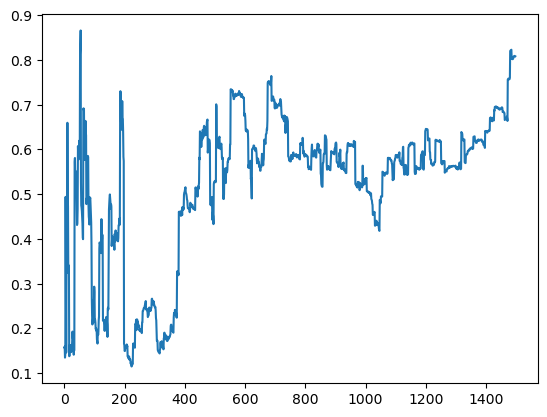

In [34]:
from matplotlib import pyplot as plt
plt.plot(plist)

In [3]:
from ensemble.epvalue import ensemble_p_cauchy
from ensemble.cit.kcit import kcit

plist = []
for i in range(2,1000):
    print("--",i,"--")
    kci_obj = ECIT(data[:i,:], kcit, ensemble_p_cauchy, k=1)
    p = kci_obj([0], [1], [2])
    plist.append(p)
    print(p)

-- 2 --
0.15729920705028488
-- 3 --
0.19290906857096102
-- 4 --
0.1407624505399837
-- 5 --
0.15378205346708007
-- 6 --
0.11111514538473466
-- 7 --
0.11073450863283296
-- 8 --
0.2971483565131513
-- 9 --
0.25858416341312274
-- 10 --
0.24989379070034773
-- 11 --
0.22668030651732152
-- 12 --
0.2848556460882077
-- 13 --
0.2740601338573414
-- 14 --
0.46288829736903425
-- 15 --
0.4604536637656258
-- 16 --
0.4386319727286252
-- 17 --
0.41608525900310567
-- 18 --
0.40251074511233365
-- 19 --
0.39844490439277136
-- 20 --
0.45439794202396033
-- 21 --
0.29586539367128784
-- 22 --
0.24569513358183037
-- 23 --
0.27416336229109683
-- 24 --
0.3885454722612973
-- 25 --
0.3992963936240531
-- 26 --
0.43564846960690007
-- 27 --
0.44280256173548815
-- 28 --
0.451894305281789
-- 29 --
0.3292154422538678
-- 30 --
0.45036201516766594
-- 31 --
0.49012770150461893
-- 32 --
0.4895127972945218
-- 33 --
0.4992285219285365
-- 34 --
0.4550196934006132
-- 35 --
0.2565377059771874
-- 36 --
0.25347942375250554
-- 37 --

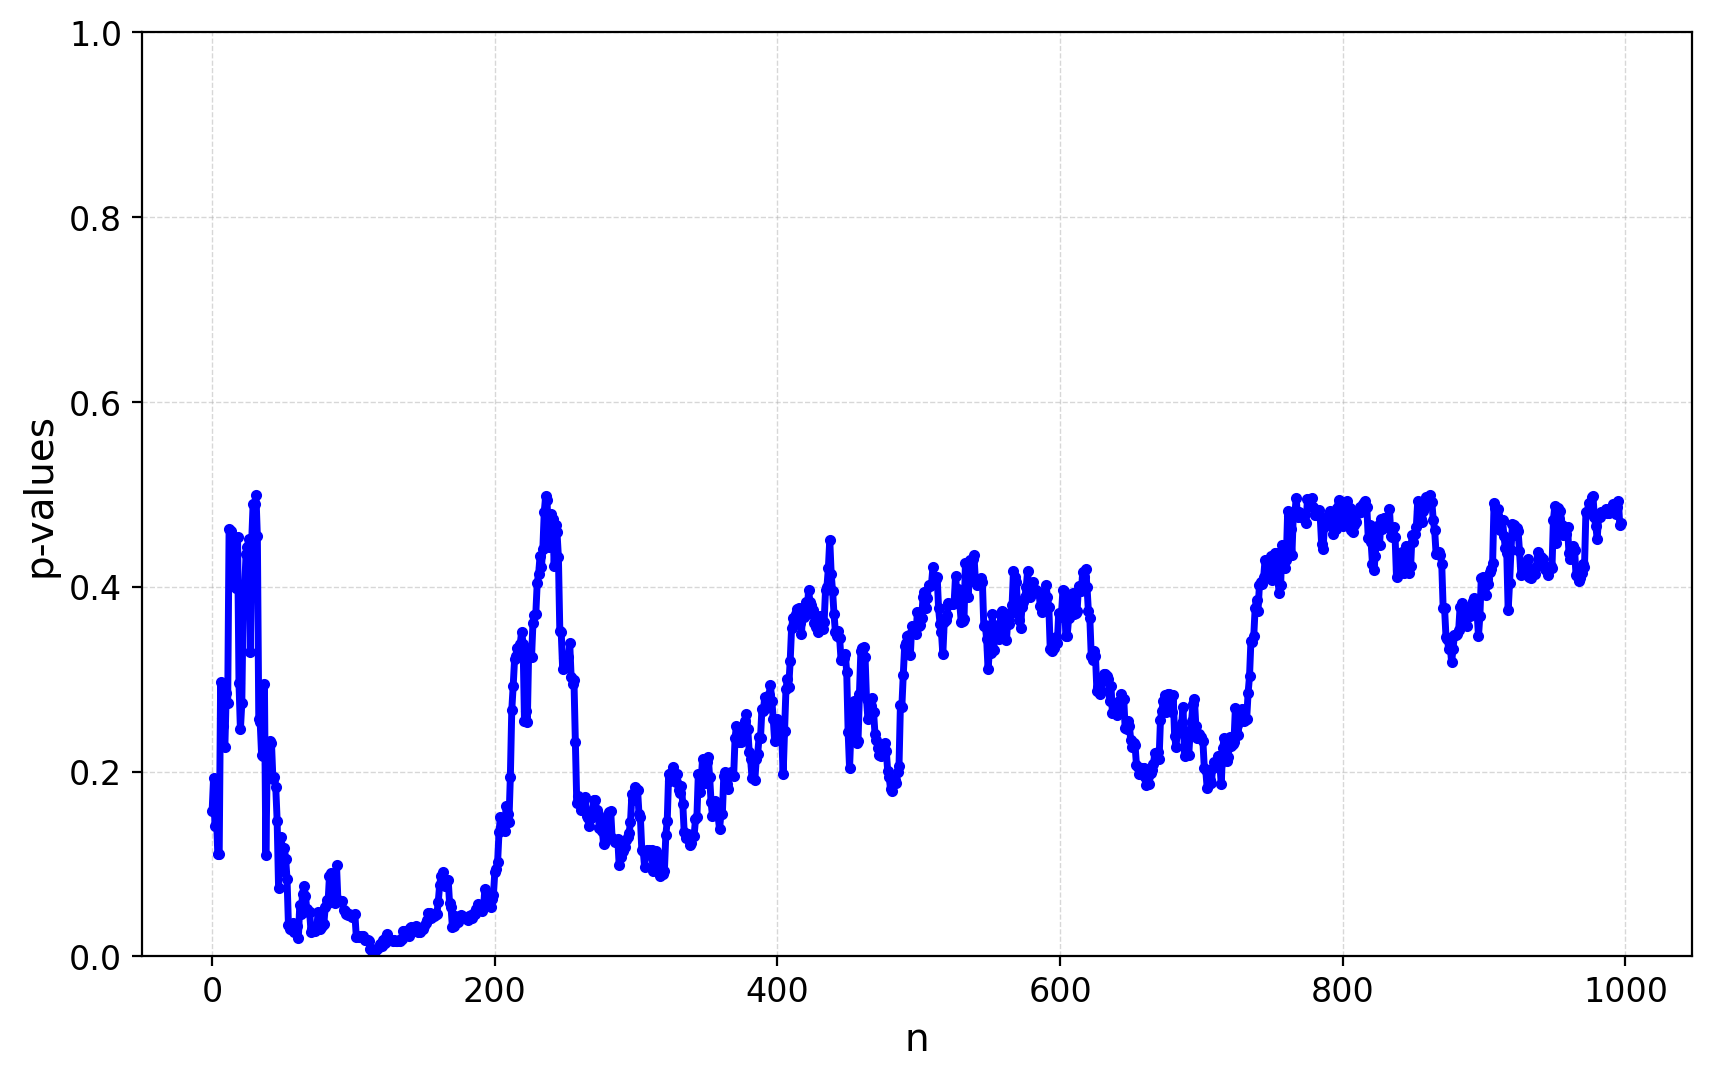

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=200)

plt.plot(plist, color='b', linewidth=2.5, linestyle='-', marker='o', markersize=3)

plt.xlabel('n', fontsize=14)
plt.ylabel('p-values', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

plt.ylim(0, 1)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()